# Firearm Object Detection using Faster R-CNN -----> Initial setup/experiment with sample set of data

In [ ]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image #reading image
import cv2
from google.colab.patches import cv2_imshow
import cv2
from matplotlib import pyplot as plt

# Downlaod Pretrained Faster R-CNN model from Pytorch

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:04<00:00, 33.9MB/s]


# Model Summary

In [ ]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

##Since the Pretrained Faseter R-CNN model is trained on the COCO Dataset the model is trained or 91 classes in tital including the background. The model is trained on general objects such as table, chair, person, fruits etc.
#However, it is not trained on the Firearms classes

In [ ]:
ig = Image.open("Image235.jpg")

In [ ]:
transform = T.ToTensor()
img = transform(ig)

In [ ]:
with torch.no_grad():
  pred = model([img])

In [ ]:
pred

[{'boxes': tensor([[5.8287e+02, 3.4471e+02, 8.3075e+02, 7.3858e+02],
          [4.9097e+02, 4.1184e+02, 5.7304e+02, 6.1075e+02],
          [1.2729e+03, 5.3800e+02, 1.4470e+03, 7.8142e+02],
          [5.5421e+02, 4.2316e+02, 6.3746e+02, 6.1880e+02],
          [1.4423e+03, 5.4180e+02, 1.6103e+03, 7.7941e+02],
          [1.5828e+03, 5.4609e+02, 1.7511e+03, 7.8887e+02],
          [8.8716e+02, 3.9453e+02, 9.8058e+02, 5.3491e+02],
          [8.2624e+02, 3.9883e+02, 8.8680e+02, 5.4326e+02],
          [1.1616e+03, 5.0351e+02, 1.3313e+03, 7.0504e+02],
          [7.1829e+02, 4.1361e+02, 8.3918e+02, 5.7231e+02],
          [9.6789e+02, 4.4951e+02, 1.1088e+03, 6.6413e+02],
          [1.0530e+03, 4.6932e+02, 1.1910e+03, 6.9031e+02],
          [1.0025e+03, 3.6250e+02, 1.0466e+03, 3.9790e+02],
          [9.1774e+02, 3.7156e+02, 9.6440e+02, 3.9329e+02],
          [7.6328e+02, 4.0341e+02, 8.7560e+02, 5.6411e+02],
          [9.7288e+02, 3.8558e+02, 1.0896e+03, 5.2265e+02],
          [9.6977e+02, 3.7933e+

In [ ]:
type(pred)

list

In [ ]:
len(pred)

1

In [ ]:
pred[0]

{'boxes': tensor([[5.8287e+02, 3.4471e+02, 8.3075e+02, 7.3858e+02],
         [4.9097e+02, 4.1184e+02, 5.7304e+02, 6.1075e+02],
         [1.2729e+03, 5.3800e+02, 1.4470e+03, 7.8142e+02],
         [5.5421e+02, 4.2316e+02, 6.3746e+02, 6.1880e+02],
         [1.4423e+03, 5.4180e+02, 1.6103e+03, 7.7941e+02],
         [1.5828e+03, 5.4609e+02, 1.7511e+03, 7.8887e+02],
         [8.8716e+02, 3.9453e+02, 9.8058e+02, 5.3491e+02],
         [8.2624e+02, 3.9883e+02, 8.8680e+02, 5.4326e+02],
         [1.1616e+03, 5.0351e+02, 1.3313e+03, 7.0504e+02],
         [7.1829e+02, 4.1361e+02, 8.3918e+02, 5.7231e+02],
         [9.6789e+02, 4.4951e+02, 1.1088e+03, 6.6413e+02],
         [1.0530e+03, 4.6932e+02, 1.1910e+03, 6.9031e+02],
         [1.0025e+03, 3.6250e+02, 1.0466e+03, 3.9790e+02],
         [9.1774e+02, 3.7156e+02, 9.6440e+02, 3.9329e+02],
         [7.6328e+02, 4.0341e+02, 8.7560e+02, 5.6411e+02],
         [9.7288e+02, 3.8558e+02, 1.0896e+03, 5.2265e+02],
         [9.6977e+02, 3.7933e+02, 1.0193e+03, 4

In [ ]:
type(pred[0])

dict

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [ ]:
bboxes, labels, scores = pred[0]['boxes'], pred[0]['labels'], pred[0]['scores']

In [ ]:
scores

tensor([0.9971, 0.9926, 0.9896, 0.9896, 0.9890, 0.9859, 0.9834, 0.9715, 0.9666,
        0.9643, 0.9555, 0.9552, 0.9020, 0.7928, 0.7740, 0.7729, 0.7317, 0.7032,
        0.6829, 0.6230, 0.6191, 0.6090, 0.5880, 0.5643, 0.5418, 0.5255, 0.5183,
        0.4844, 0.4819, 0.4599, 0.4498, 0.4327, 0.4326, 0.4235, 0.4234, 0.4234,
        0.4231, 0.4110, 0.4080, 0.3853, 0.3762, 0.3665, 0.3563, 0.3377, 0.3264,
        0.3233, 0.3202, 0.3196, 0.3181, 0.3143, 0.3076, 0.2910, 0.2909, 0.2790,
        0.2665, 0.2641, 0.2549, 0.2548, 0.2514, 0.2511, 0.2409, 0.2392, 0.2387,
        0.2369, 0.2305, 0.2240, 0.2229, 0.2217, 0.2107, 0.2057, 0.2049, 0.1992,
        0.1898, 0.1882, 0.1870, 0.1784, 0.1776, 0.1750, 0.1738, 0.1735, 0.1731,
        0.1582, 0.1576, 0.1536, 0.1535, 0.1520, 0.1514, 0.1488, 0.1386, 0.1384,
        0.1371, 0.1357, 0.1341, 0.1336, 0.1336, 0.1333, 0.1251, 0.1230, 0.1215,
        0.1204])

In [ ]:
scores > 0.99

tensor([ True,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False])

In [ ]:
torch.argwhere(scores > 0.90)

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12]])

In [ ]:
num = torch.argwhere(scores > 0.90).shape[0]

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
igg = cv2.imread("Image235.jpg")
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
  class_name = coco_names[labels.numpy()[i]-1]
  igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0,255,0), 1)
  igg = cv2.putText(igg, class_name, (x1,y1 - 10), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

# Infer Pretrained model with Firearm sample Data set to understand the Dataset and model behaviour

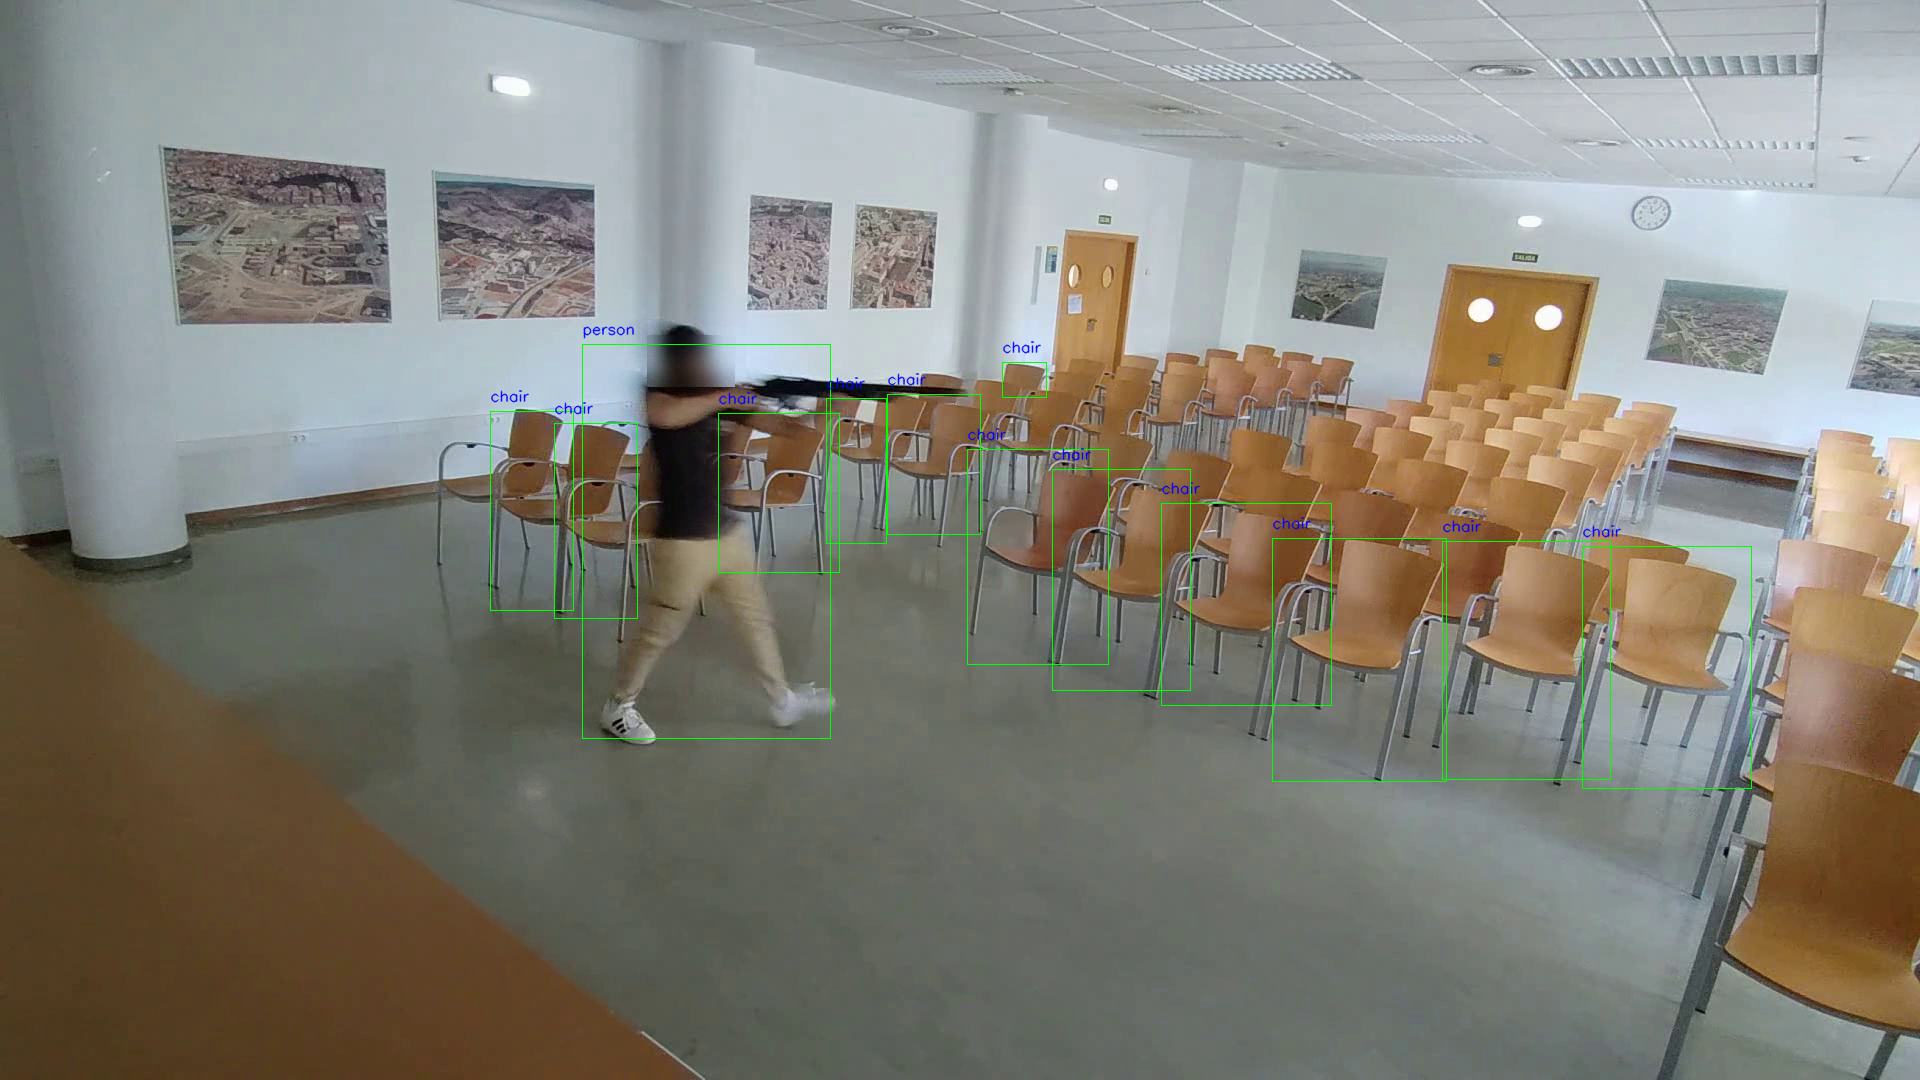

In [ ]:
cv2_imshow(igg)

## The pretrained modle is not trained on the firearm class dataset hence the model doesnot predict the Machine_Gun as an object in the above sample

# Finetune or Re-train the Pretrained Faster R-CNN model with Firearm sample dataset

In [ ]:
import random
from PIL import Image, ImageDraw
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torchvision
from torchvision import transforms as T
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
df = pd.read_csv("val.csv")

In [ ]:
# Assuming 'df' is your DataFrame and it has a column 'image_name'
base_path = 'val_data'

# Check if each file exists in the specified directory
existing_files = df['image_name'].apply(lambda x: os.path.exists(os.path.join(base_path, x)))

# Filter the DataFrame to only include rows with existing files
filtered_df = df[existing_files]

In [ ]:
# Remove rows where the class is 'NoGun'
filtered_df = filtered_df[filtered_df['class'] != 'NoGun']

In [ ]:
# Assuming 'filtered_df' is your DataFrame
sampled_df = filtered_df.groupby('class').apply(lambda x: x.sample(n=10, replace=False)).reset_index(drop=True)

/tmp/ipykernel_3797/1561816170.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = filtered_df.groupby('class').apply(lambda x: x.sample(n=10, replace=False)).reset_index(drop=True)


In [ ]:
sampled_df.head()


,image_name,class,xmin,ymin,xmax,ymax
0,Image51656.jpg,HandGun,486.000000,318.000000,508.000000,360.500000
1,Image45235.jpg,HandGun,1499.999998,206.000001,1571.999999,289.500001
2,Image64303.jpg,HandGun,988.666667,582.333333,1119.666667,670.333333
3,Image58976.jpg,HandGun,380.000000,296.000000,397.000000,319.000000
4,Image50491.jpg,HandGun,1319.666675,496.333334,1405.333341,556.666667


In [ ]:
sampled_df.shape

(20, 6)

In [ ]:
#unique_imgs = sampled_df.image_name.unique()

unique_imgs = filtered_df.image_name.unique()

In [ ]:
class CustDat(torch.utils.data.Dataset):
    def __init__(self, df, unique_imgs, indices):
        self.df = df
        self.unique_imgs = unique_imgs
        self.indices = indices

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        image_name = self.unique_imgs[self.indices[idx]]
        # Fetch the row for the current image
        image_data = self.df[self.df.image_name == image_name]

        # Ensure that only the columns for bounding box coordinates are included
        boxes = image_data[['xmin', 'ymin', 'xmax', 'ymax']].values.astype(float)

        # Assuming all instances have the same label which should be extracted or predefined properly
        labels = torch.ones((boxes.shape[0],), dtype=torch.int64)  # Ensure it's a 1D tensor for all boxes

        # Load the image
        img = Image.open(f"val_data/{image_name}").convert("RGB")

        # Construct the target dictionary
        target = {
            "boxes": torch.tensor(boxes, dtype=torch.float32),
            "labels": labels  # Now 'labels' matches the expected PyTorch format
        }

        return T.ToTensor()(img), target

# Example usage of this class
label_map = {'Machine_Gun': 0, 'HandGun': 1}  # Just for reference in case you need label mapping



In [ ]:
train_ids, val_ids = train_test_split(range(unique_imgs.shape[0]), test_size = 0.1)

In [ ]:
def custom_collate(data):
    return data

In [ ]:
train_d1 = torch.utils.data.DataLoader(CustDat(df, unique_imgs, train_ids),
                                      batch_size=16,
                                      shuffle=True,
                                      collate_fn=custom_collate,
                                      pin_memory=True if torch.cuda.is_available() else False)

val_d1 = torch.utils.data.DataLoader(CustDat(df, unique_imgs, val_ids),
                                      batch_size=8,
                                      shuffle=False,
                                      collate_fn=custom_collate,
                                      pin_memory=True if torch.cuda.is_available() else False)


In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Replace the classifier with a new one, that has
# num_classes which is user-defined + background
num_classes = 3  # 2 class (MachineGun, HandGun) + background
in_features = model.roi_heads.box_predictor.cls_score.in_features

# Replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
num_epochs = 10

# Model Summary after changing the output layer of the Faster R-CNN model to accomodate Machine_Gun, Handgun and background classes only

In [ ]:
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

### Training the sample data for 10 epochs

In [ ]:
for epoch in range(num_epochs):
    epoch_loss = 0
    for data in train_d1:
        imgs = []
        targets = []
        for d in data:
            imgs.append(d[0].to(device))
            targ = {}
            targ["boxes"] = d[1]["boxes"].to(device)
            targ["labels"] = d[1]["labels"].to(device)
            targets.append(targ)
        loss_dict = model(imgs, targets)
        loss = sum(v for v in loss_dict.values())
        epoch_loss += loss.cpu().detach().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch Loss: {epoch_loss}")


Epoch Loss: 55.34203343093395
Epoch Loss: 49.24260529875755
Epoch Loss: 48.531343176960945
Epoch Loss: 46.27850206196308
Epoch Loss: 43.78413388133049
Epoch Loss: 41.558336943387985
Epoch Loss: 39.74094381928444
Epoch Loss: 38.128939270973206
Epoch Loss: 36.72246403992176
Epoch Loss: 35.53423172235489


In [ ]:
model.eval()
data = iter(val_d1).__next__()

In [ ]:
img = data[0][0]

In [ ]:
img = data[0][0]
boxes = data[0][1]["boxes"]
labels = data[0][1]["labels"]

In [ ]:
output = model([img.to(device)])

In [ ]:
output

[{'boxes': tensor([[308.6223, 152.9643, 395.7563, 231.9724],
          [277.6599, 127.6755, 399.0620, 246.1235],
          [315.0323, 128.8874, 366.0968, 235.6453],
          [319.9284, 143.7985, 383.2494, 280.5811],
          [327.1687, 179.2846, 392.6436, 230.7278],
          [270.9694, 205.6411, 293.0605, 251.5831],
          [288.8389, 160.6023, 409.7188, 203.3798],
          [271.1735, 189.8280, 393.4662, 246.2935],
          [280.8893, 142.8582, 384.7787, 317.7619],
          [295.8791, 114.0554, 356.3938, 258.9488],
          [320.4926, 133.0339, 353.7502, 210.8320]], device='cuda:0',
         grad_fn=<StackBackward0>),
  'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'),
  'scores': tensor([0.8709, 0.4783, 0.4479, 0.1731, 0.1559, 0.1136, 0.0820, 0.0620, 0.0564,
          0.0563, 0.0522], device='cuda:0', grad_fn=<IndexBackward0>)}]

In [ ]:
out_bbox = output[0]["boxes"]
out_scores = output[0]["scores"]
out_labels = output[0]["labels"]

In [ ]:
#torch.argwhere(out_scores > 0.10)
torch.argwhere(out_scores)

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], device='cuda:0')

In [ ]:
num = torch.argwhere(out_scores).shape[0]

In [ ]:
num

11

In [ ]:
keep = torchvision.ops.nms(out_bbox, out_scores,0.5)

In [ ]:
out_bbox.shape, keep.shape

(torch.Size([11, 4]), torch.Size([11]))

In [ ]:
im = (img.permute(1, 2, 0).cpu().detach().numpy() * 255).astype("uint8")

In [ ]:
vsample = Image.fromarray(im)

# Evaluating the results of a sample image for the IOU of 0.5

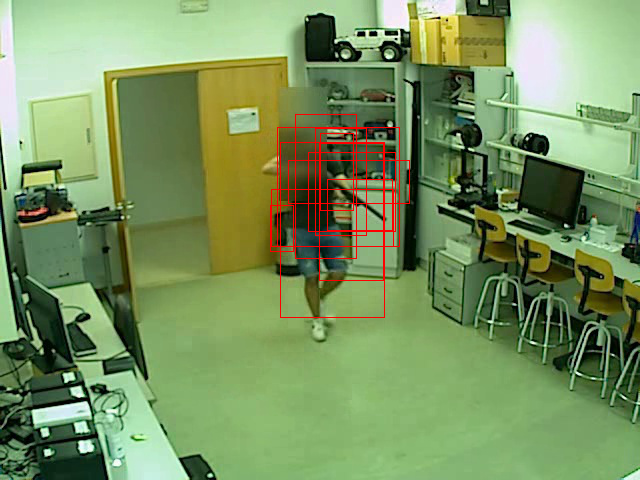

In [ ]:

draw = ImageDraw.Draw(vsample)
for box in out_bbox:
    draw.rectangle(list(box), fill=None, outline = "red")
vsample

In [ ]:
file_path = "image.jpg"

# Save the image
vsample.save(file_path, "JPEG")

In [ ]:
label_names = ["Machine_Gun","HandGun"]

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX


In [ ]:
#bbox = out_bbox.detach().numpy().astype("int")
# Assuming out_bbox is your CUDA tensor
# Move the tensor to CPU
out_bbox_cpu = out_bbox.detach().cpu()

# Convert the CPU tensor to a NumPy array
bbox_numpy = out_bbox_cpu.numpy()

# Now you can convert it to int if needed
bbox_int = bbox_numpy.astype("int")


In [ ]:
# Read an image
image = cv2.imread('image.jpg')

# Convert BGR to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
igg = cv2.imread("image.jpg")
for i in range(1):
  x1, y1, x2, y2 = bbox_int[i]
  class_name = label_names[out_labels.cpu().numpy()[i]-1]
  igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0,255,0), 1)
  igg = cv2.putText(igg, class_name, (x1,y1 - 10), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

# Evaluating the results of a sample image for the IOU of 0.5 and adding the classification details to the best bounding box

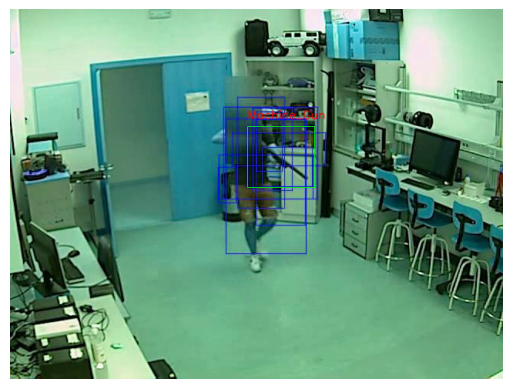

In [ ]:

# Display the image
plt.imshow(igg)
plt.axis('off')  # Hide axis
plt.show()

##Validating the Sample model training

In [ ]:
class CustData(torch.utils.data.Dataset):
    def __init__(self, df, unique_imgs, indices):
        self.df = df
        self.unique_imgs = unique_imgs
        self.indices = indices

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        image_name = self.unique_imgs[self.indices[idx]]
        image_data = self.df[self.df.image_name == image_name]
        boxes = image_data[['xmin', 'ymin', 'xmax', 'ymax']].values.astype(float)
        labels = torch.ones((boxes.shape[0],), dtype=torch.int64)  # Adjust as necessary

        img_path = f"val_data/{image_name}"
        img = Image.open(img_path).convert("RGB")
        img = T.ToTensor()(img)  # Convert image to tensor

        target = {"boxes": torch.tensor(boxes, dtype=torch.float32), "labels": labels}
        return img, target

In [ ]:
def custom_collated(batch):
    imgs, targets = zip(*batch)  # This line ensures that imgs and targets are separated correctly
    imgs = list(imgs)  # Convert the tuple to a list if necessary
    targets = list(targets)  # Convert the tuple to a list if necessary
    return imgs, targets

In [ ]:
val_d12 = torch.utils.data.DataLoader(CustData(df, unique_imgs, val_ids),
                                      batch_size=8,
                                      shuffle=False,
                                      collate_fn=custom_collated,
                                      pin_memory=True if torch.cuda.is_available() else False)

In [ ]:
import numpy as np
from collections import defaultdict
from torchvision.ops import box_iou


def evaluate_model(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    detections = defaultdict(list)
    ground_truths = defaultdict(list)

    with torch.no_grad():
        for images, targets in data_loader:
            images = [img.to(device) for img in images]
            outputs = model(images)

            for i, output in enumerate(outputs):
                # Check if any boxes were detected
                if output['labels'].size(0) == 0:
                    continue  # No detections for this image, skip

                boxes = output['boxes'].cpu().numpy()
                labels = output['labels'].cpu().numpy()
                scores = output['scores'].cpu().numpy()

                # Append detections for each label
                for label, box, score in zip(labels, boxes, scores):
                    detections[label].append({
                        'boxes': box,
                        'scores': score
                    })

                # Append ground truths
                gt_boxes = targets[i]['boxes'].cpu().numpy()
                gt_labels = targets[i]['labels'].cpu().numpy()
                for label, box in zip(gt_labels, gt_boxes):
                    ground_truths[label].append({
                        'boxes': box
                    })

    return detections, ground_truths



# Example of evaluating the model
detections, ground_truths = evaluate_model(model, val_d12, device)


In [ ]:
def calculate_map(detections, ground_truths, iou_threshold=0.5):
    # Placeholder for calculating mAP
    average_precisions = []

    for c in detections.keys():
        class_detections = np.array([d['boxes'] for d in detections[c]]).reshape(-1, 4)
        class_scores = np.array([d['scores'] for d in detections[c]]).reshape(-1)
        class_gt_boxes = np.array([gt['boxes'] for gt in ground_truths[c]]).reshape(-1, 4)

        # Calculate AP for this class
        if len(class_gt_boxes) == 0:
            continue

        # Sort detections by score in descending order
        sorted_indices = np.argsort(-class_scores)
        sorted_detections = class_detections[sorted_indices]

        matched = np.zeros(len(class_gt_boxes), dtype=np.bool_)  # Updated dtype to np.bool_

        tp = np.zeros(len(sorted_detections))
        fp = np.zeros(len(sorted_detections))

        for d_idx, detection in enumerate(sorted_detections):
            max_iou = 0
            max_idx = -1
            for gt_idx, gt in enumerate(class_gt_boxes):
                iou = box_iou(torch.tensor([detection]), torch.tensor([gt])).numpy()[0, 0]
                if iou > max_iou:
                    max_iou = iou
                    max_idx = gt_idx

            if max_iou >= iou_threshold:
                if not matched[max_idx]:
                    tp[d_idx] = 1
                    matched[max_idx] = True
                else:
                    fp[d_idx] = 1
            else:
                fp[d_idx] = 1

        tp_cumsum = np.cumsum(tp)
        fp_cumsum = np.cumsum(fp)
        recalls = tp_cumsum / len(class_gt_boxes)
        precisions = tp_cumsum / (tp_cumsum + fp_cumsum)

        # Calculate AP
        ap = np.sum((recalls[1:] - recalls[:-1]) * precisions[1:])
        average_precisions.append(ap)

    # Calculate mAP
    mAP = np.mean(average_precisions) if average_precisions else 0
    return mAP

# Evaluating the Firarm detection model with the mAP score

In [ ]:
mAP = calculate_map(detections, ground_truths)
print("mAP:", mAP)

mAP: 0.7718516737345433


### The model has achieved a mAP score of 0.77 for the sample data of 20 samples